In [239]:
import yfinance as yf
import mplfinance as mpf

btc = yf.Ticker('BTC-USD')

btc_hist = btc.history(period='1mo', interval='15m')

# drop the columns that are not needed
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

print(len(btc_hist))

btc_hist

2881


,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040
...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656


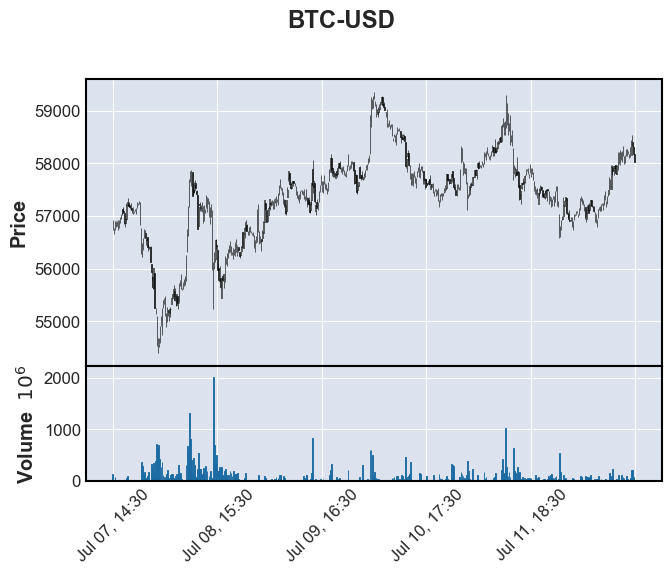

In [240]:
mpf.plot(btc_hist[-500:], type='candle', volume=True, title='BTC-USD')

In [410]:
# compute most popular indicators using ta library.
import pandas as pd
import pandas_ta as ta

btc_hist.set_index(pd.DatetimeIndex(btc_hist.index), inplace=True)

# # moving averages
btc_hist.ta.sma(length=10, append=True)
# btc_hist.ta.sma(length=50, append=True)
# btc_hist.ta.sma(length=200, append=True)
#
# # exponential moving averages
# btc_hist.ta.ema(length=10, append=True)
# btc_hist.ta.ema(length=50, append=True)
# btc_hist.ta.ema(length=200, append=True)
#
# # RSI
# btc_hist.ta.rsi(length=14, append=True)
#
# # MACD
# btc_hist.ta.macd(append=True)
#
# # Bollinger Bands
# btc_hist.ta.bbands(append=True)
#
# # ATR
# btc_hist.ta.atr(append=True)
#
# # ADX
# btc_hist.ta.adx(append=True)
#
# # Stochastics
# btc_hist.ta.stoch(append=True)
# btc_hist.ta.stochrsi(append=True)

btc_hist

,Open,High,Low,Close,Volume,SMA_10
Datetime,,,,,,
2024-06-12 19:15:00+00:00,69170.890625,69192.062500,68555.218750,68560.406250,156852224,NaN
2024-06-12 19:30:00+00:00,68522.750000,68522.750000,68107.625000,68131.226562,764153856,NaN
2024-06-12 19:45:00+00:00,68126.609375,68126.609375,67361.812500,67500.039062,1053749248,NaN
2024-06-12 20:00:00+00:00,67568.132812,67787.031250,67456.046875,67741.304688,322367488,NaN
2024-06-12 20:15:00+00:00,67758.000000,67895.718750,67758.000000,67895.718750,270039040,NaN
...,...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58159.946094
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58185.712891
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656,58194.042969


In [411]:
dataset = btc_hist.copy()

First row index: 2024-06-12 21:30:00+00:00


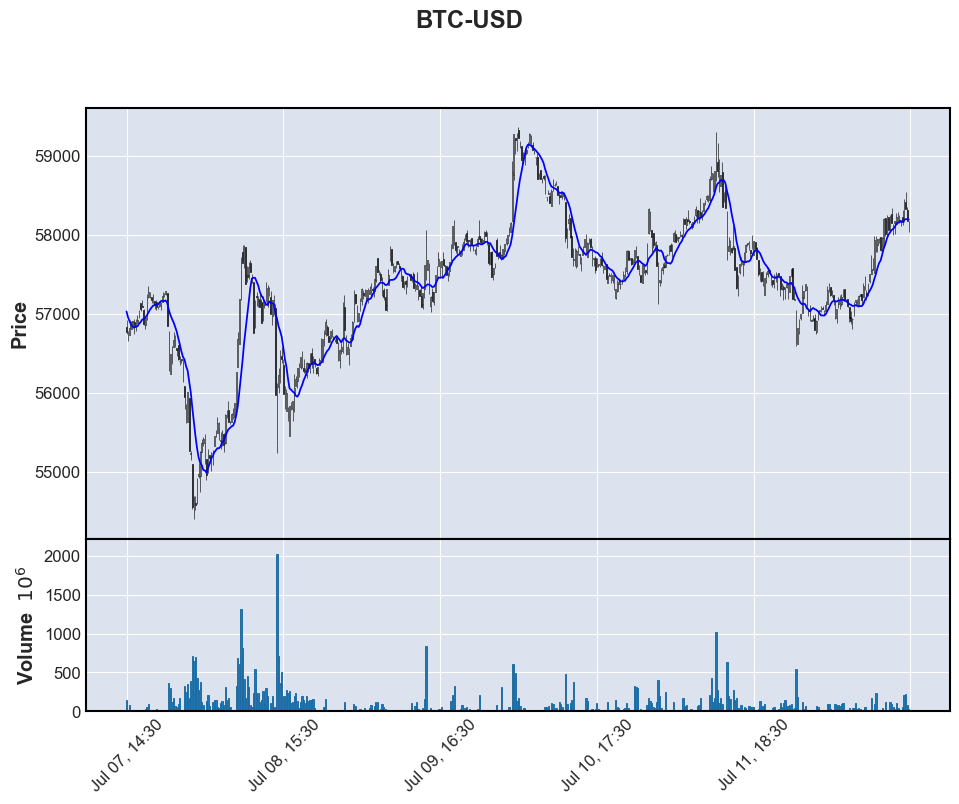

In [412]:
# find the first row index that has no NaN values. Similar to first_valid_index but return the row where all columns are not NaN
first_row = dataset.notnull().all(axis=1).idxmax()

print(f'First row index: {first_row}')

# drop the preceding rows
dataset = dataset.loc[first_row:]

to_plot = dataset[-500:]

# plot the data with the SMAs and EMAs, taking full screen width
mpf.plot(to_plot, type='candle', volume=True, title='BTC-USD', addplot=[
    mpf.make_addplot(to_plot['SMA_10'], color='blue'),
    # mpf.make_addplot(to_plot['SMA_50'], color='green'),
    # mpf.make_addplot(to_plot['SMA_200'], color='red'),
    # mpf.make_addplot(to_plot['EMA_10'], color='blue'),
    # mpf.make_addplot(to_plot['EMA_50'], color='green'),
    # mpf.make_addplot(to_plot['EMA_200'], color='red'),
    # mpf.make_addplot(to_plot['RSI_14'], panel=1, color='black'),
    # mpf.make_addplot(to_plot['MACD_12_26_9'], panel=2, color='black'),
    # mpf.make_addplot(to_plot['MACDh_12_26_9'], panel=2, color='blue'),
    # mpf.make_addplot(to_plot['MACDs_12_26_9'], panel=2, color='red'),
    # mpf.make_addplot(to_plot['BBM_5_2.0'], panel=3, color='black'),
    # mpf.make_addplot(to_plot['BBU_5_2.0'], panel=3, color='blue'),
    # mpf.make_addplot(to_plot['BBL_5_2.0'], panel=3, color='blue'),
    # mpf.make_addplot(to_plot['ATRr_14'], panel=4, color='black'),
    # mpf.make_addplot(to_plot['ADX_14'], panel=5, color='black'),
    # mpf.make_addplot(to_plot['STOCHk_14_3_3'], panel=6, color='black'),
    # mpf.make_addplot(to_plot['STOCHd_14_3_3'], panel=6, color='blue'),
    # mpf.make_addplot(to_plot['STOCHRSIk_14_14_3_3'], panel=7, color='black'),
    # mpf.make_addplot(to_plot['STOCHRSId_14_14_3_3'], panel=7, color='blue'),
], figscale=1.5)

In [413]:
dataset

,Open,High,Low,Close,Volume,SMA_10
Datetime,,,,,,
2024-06-12 21:30:00+00:00,68381.828125,68576.734375,68356.968750,68576.734375,280418304,68131.971875
2024-06-12 21:45:00+00:00,68573.875000,68597.265625,68453.710938,68527.867188,154542080,68128.717969
2024-06-12 22:00:00+00:00,68506.132812,68515.921875,68407.562500,68413.750000,36225024,68156.970312
2024-06-12 22:15:00+00:00,68411.039062,68411.039062,68269.343750,68306.367188,27852800,68237.603125
2024-06-12 22:30:00+00:00,68295.578125,68307.992188,68265.382812,68286.554688,15482880,68292.128125
...,...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58159.946094
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58185.712891
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656,58194.042969


In [414]:
# add a new column to the dataset that is the close value of the next row. This will be used to predict the next close value.
dataset['Next Close'] = dataset['Close'].shift(-1)
dataset

,Open,High,Low,Close,Volume,SMA_10,Next Close
Datetime,,,,,,,
2024-06-12 21:30:00+00:00,68381.828125,68576.734375,68356.968750,68576.734375,280418304,68131.971875,68527.867188
2024-06-12 21:45:00+00:00,68573.875000,68597.265625,68453.710938,68527.867188,154542080,68128.717969,68413.750000
2024-06-12 22:00:00+00:00,68506.132812,68515.921875,68407.562500,68413.750000,36225024,68156.970312,68306.367188
2024-06-12 22:15:00+00:00,68411.039062,68411.039062,68269.343750,68306.367188,27852800,68237.603125,68286.554688
2024-06-12 22:30:00+00:00,68295.578125,68307.992188,68265.382812,68286.554688,15482880,68292.128125,68317.750000
...,...,...,...,...,...,...,...
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58159.946094,58316.742188
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58185.712891,58324.429688
2024-07-12 18:45:00+00:00,58414.703125,58532.554688,58324.429688,58324.429688,218822656,58194.042969,58173.113281


In [415]:
print(f'Number of NaN values in the dataset: {dataset.isnull().sum().sum()}')

# drop the last row as it has NaN values
dataset.dropna(inplace=True)

print(f'Number of NaN values in the dataset after dropping: {dataset.isnull().sum().sum()}')

dataset

Number of NaN values in the dataset: 1
Number of NaN values in the dataset after dropping: 0


,Open,High,Low,Close,Volume,SMA_10,Next Close
Datetime,,,,,,,
2024-06-12 21:30:00+00:00,68381.828125,68576.734375,68356.968750,68576.734375,280418304,68131.971875,68527.867188
2024-06-12 21:45:00+00:00,68573.875000,68597.265625,68453.710938,68527.867188,154542080,68128.717969,68413.750000
2024-06-12 22:00:00+00:00,68506.132812,68515.921875,68407.562500,68413.750000,36225024,68156.970312,68306.367188
2024-06-12 22:15:00+00:00,68411.039062,68411.039062,68269.343750,68306.367188,27852800,68237.603125,68286.554688
2024-06-12 22:30:00+00:00,68295.578125,68307.992188,68265.382812,68286.554688,15482880,68292.128125,68317.750000
...,...,...,...,...,...,...,...
2024-07-12 18:00:00+00:00,58183.613281,58185.796875,58111.718750,58185.796875,13164544,58169.479688,58153.015625
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58159.946094,58316.742188
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58185.712891,58324.429688


In [416]:
# add a new column to the dataset that is the percentage change of the close value of the next row.
dataset['Expected Change'] = (dataset['Next Close'] - dataset['Close']) / dataset['Close']
dataset

,Open,High,Low,Close,Volume,SMA_10,Next Close,Expected Change
Datetime,,,,,,,,
2024-06-12 21:30:00+00:00,68381.828125,68576.734375,68356.968750,68576.734375,280418304,68131.971875,68527.867188,-0.000713
2024-06-12 21:45:00+00:00,68573.875000,68597.265625,68453.710938,68527.867188,154542080,68128.717969,68413.750000,-0.001665
2024-06-12 22:00:00+00:00,68506.132812,68515.921875,68407.562500,68413.750000,36225024,68156.970312,68306.367188,-0.001570
2024-06-12 22:15:00+00:00,68411.039062,68411.039062,68269.343750,68306.367188,27852800,68237.603125,68286.554688,-0.000290
2024-06-12 22:30:00+00:00,68295.578125,68307.992188,68265.382812,68286.554688,15482880,68292.128125,68317.750000,0.000457
...,...,...,...,...,...,...,...,...
2024-07-12 18:00:00+00:00,58183.613281,58185.796875,58111.718750,58185.796875,13164544,58169.479688,58153.015625,-0.000563
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58159.946094,58316.742188,0.002815
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58185.712891,58324.429688,0.000132


In [417]:
# start of the ML part
# goal is to predict the 'Expected Change' column using the other columns in the dataset (except 'Next Close' column).
# the model will perform a regression task.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# split the dataset into features and target
X = dataset.drop(columns=['Next Close', 'Expected Change'])

# target
Y = dataset['Expected Change']

In [418]:
X

,Open,High,Low,Close,Volume,SMA_10
Datetime,,,,,,
2024-06-12 21:30:00+00:00,68381.828125,68576.734375,68356.968750,68576.734375,280418304,68131.971875
2024-06-12 21:45:00+00:00,68573.875000,68597.265625,68453.710938,68527.867188,154542080,68128.717969
2024-06-12 22:00:00+00:00,68506.132812,68515.921875,68407.562500,68413.750000,36225024,68156.970312
2024-06-12 22:15:00+00:00,68411.039062,68411.039062,68269.343750,68306.367188,27852800,68237.603125
2024-06-12 22:30:00+00:00,68295.578125,68307.992188,68265.382812,68286.554688,15482880,68292.128125
...,...,...,...,...,...,...
2024-07-12 18:00:00+00:00,58183.613281,58185.796875,58111.718750,58185.796875,13164544,58169.479688
2024-07-12 18:15:00+00:00,58217.949219,58304.734375,58126.339844,58153.015625,53442560,58159.946094
2024-07-12 18:30:00+00:00,58161.183594,58452.890625,58161.183594,58316.742188,211261440,58185.712891


In [419]:
Y

Datetime
2024-06-12 21:30:00+00:00   -0.000713
2024-06-12 21:45:00+00:00   -0.001665
2024-06-12 22:00:00+00:00   -0.001570
2024-06-12 22:15:00+00:00   -0.000290
2024-06-12 22:30:00+00:00    0.000457
                               ...   
2024-07-12 18:00:00+00:00   -0.000563
2024-07-12 18:15:00+00:00    0.002815
2024-07-12 18:30:00+00:00    0.000132
2024-07-12 18:45:00+00:00   -0.002594
2024-07-12 19:00:00+00:00   -0.002517
Name: Expected Change, Length: 2871, dtype: float64

In [420]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [421]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (2583, 6)
X_test shape: (288, 6)
Y_train shape: (2583,)
Y_test shape: (288,)


In [422]:
X_train

,Open,High,Low,Close,Volume,SMA_10
Datetime,,,,,,
2024-06-21 01:15:00+00:00,64651.136719,64841.660156,64651.136719,64836.675781,75333632,64834.623828
2024-06-23 21:15:00+00:00,63644.207031,63712.207031,63523.562500,63694.218750,249962496,63924.787891
2024-06-24 12:00:00+00:00,61277.265625,61329.671875,61190.152344,61323.511719,242849792,61212.381250
2024-06-16 22:15:00+00:00,66681.132812,66681.132812,66573.234375,66647.156250,174475264,66524.058594
2024-07-03 06:45:00+00:00,60955.382812,60956.113281,60903.394531,60915.523438,15175680,60913.213281
...,...,...,...,...,...,...
2024-06-29 23:00:00+00:00,60856.953125,60927.210938,60856.953125,60927.210938,12679168,60909.970703
2024-06-24 07:15:00+00:00,62261.546875,62261.546875,62167.500000,62234.113281,228556800,62367.973437
2024-06-24 16:00:00+00:00,60793.109375,60839.585938,60703.046875,60829.218750,585861120,61169.521875


In [423]:
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()

# scale while keeping the column names and datetime
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# the LSTM expects a 3D input, so reshape the data
X_train_scaled = X_train_scaled.values.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled = X_test_scaled.values.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [424]:
X_train_scaled

array([[[ 0.81935435,  0.85746719,  0.83668134,  0.87340712,
         -0.07285294,  0.86866531]],

       [[ 0.53424339,  0.53637366,  0.51864808,  0.54972096,
          0.97086459,  0.61092429]],

       [[-0.13595329, -0.14096   , -0.13949224, -0.12195862,
          0.92835356, -0.1574543 ]],

       ...,

       [[-0.27304156, -0.28028709, -0.27688076, -0.26200397,
          2.97845529, -0.16959563]],

       [[-0.08707804, -0.10390664, -0.077343  , -0.08328592,
         -0.47949248, -0.05709312]],

       [[ 0.70870842,  0.69221074,  0.67576472,  0.66329759,
         -0.26927523,  0.65152505]]])

In [425]:
X_test_scaled

array([[[ 1.25271474,  1.24364451,  1.25415737,  1.24020067,
         -0.52310516,  1.19008889]],

       [[-1.20053204, -1.21285646, -1.20444795, -1.18846538,
         -0.52310516, -1.15326882]],

       [[-0.04190032, -0.02764999, -0.04216928, -0.02026612,
         -0.31068462, -0.0482236 ]],

       ...,

       [[-0.27290662, -0.25904632, -0.25134414, -0.23884107,
         -0.13890234, -0.24548149]],

       [[-0.24670319, -0.2652341 , -0.23644282, -0.25613605,
         -0.52310516, -0.25111495]],

       [[-0.08269476, -0.09710587, -0.08045437, -0.0926478 ,
         -0.49023958, -0.07469008]]])

In [257]:
# now the same process but with a neural network (use MLPRegressor)
from sklearn.neural_network import MLPRegressor

# create the model
model = MLPRegressor(hidden_layer_sizes=(20, 20), max_iter=100000, random_state=42, alpha=0.0001,
                     learning_rate_init=0.001, learning_rate='constant', tol=1e-4, n_iter_no_change=10,
                     validation_fraction=0.1,
                     early_stopping=True,
                     activation='tanh',
                     solver='adam',
                     verbose=0
                     )

# train the model
model.fit(X_train_scaled, Y_train)

# print number of iterations
print(f'Number of iterations: {model.n_iter_}')

ValueError: Found array with dim 3. MLPRegressor expected <= 2.

In [258]:
import os
import numpy as np

space = np.logspace(-2, -5, 10)

pd.Series(space)

0    0.010000
1    0.004642
2    0.002154
3    0.001000
4    0.000464
5    0.000215
6    0.000100
7    0.000046
8    0.000022
9    0.000010
dtype: float64

In [62]:
parameter_space = {
    'hidden_layer_sizes': [(20, 20)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'learning_rate_init': space
}

from sklearn.model_selection import GridSearchCV

cpu_count = os.cpu_count()
print(f'Number of CPUs: {cpu_count}')

clf = GridSearchCV(model, parameter_space, n_jobs=cpu_count-1, verbose=2)
clf.fit(X_train_scaled, Y_train)

print(f'Best parameters found: {clf.best_params_}')

Number of CPUs: 8
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.004641588833612777, 'solver': 'adam'}


AttributeError: 'MLPRegressor' object has no attribute 'loss_curve_'

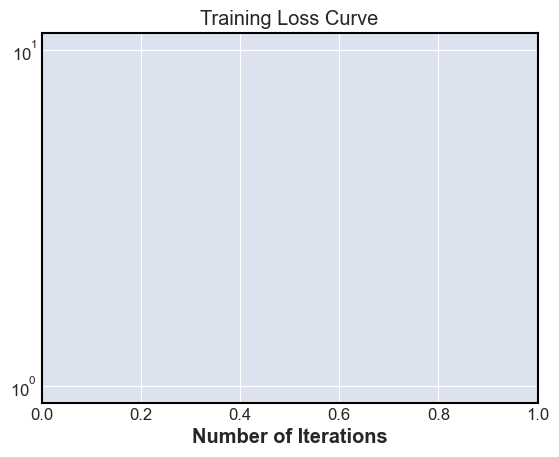

In [259]:
# plot the training loss, use log scale for y-axis
# also add the validation scores
import matplotlib.pyplot as plt

plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Training Loss Curve')

plt.plot(model.loss_curve_, label='Training Loss')
plt.legend()
plt.show()

# also plot the validation scores
plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Validation Scores')

# opposite the validation scores
values = [1 - x for x in model.validation_scores_]

plt.plot(values, label='Validation Scores')
plt.legend()
plt.show()

In [260]:
# make predictions
predictions = model.predict(X_test_scaled)

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

pd.Series(predictions, name='Predictions')


NotFittedError: This MLPRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [261]:
# plot the predictions vs the actual values as a scatter plot. Use the same scale for both axes.
import matplotlib.pyplot as plt

assert len(Y_test) == len(predictions)

plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values')

global_min = min(min(Y_test), min(predictions))
global_max = max(max(Y_test), max(predictions))

plt.xlim(global_min, global_max)
plt.ylim(global_min, global_max)

plt.plot([global_min, global_max], [global_min, global_max], color='red')

plt.show()


AssertionError: 

In [66]:
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions})

# add a percentage of error column
df['Error %'] = np.abs((df['Expected'] - df['Predicted']) / df['Expected']) * 100

# format percentage of error column
df['Error %'] = df['Error %'].map('{:.2f}%'.format)

df

,Expected,Predicted,Error %
Datetime,,,
2024-06-22 12:00:00+00:00,0.000701,0.007421,958.92%
2024-07-02 03:45:00+00:00,0.000361,-0.005749,1693.82%
2024-06-30 09:15:00+00:00,-0.000304,0.005161,1799.21%
2024-07-03 21:30:00+00:00,0.003182,-0.010342,424.99%
2024-06-16 21:45:00+00:00,0.003787,0.000903,76.15%
...,...,...,...
2024-07-02 01:30:00+00:00,0.001113,0.001395,25.31%
2024-06-29 21:00:00+00:00,0.001281,-0.006052,572.41%
2024-07-02 15:00:00+00:00,-0.002366,0.005348,326.05%


In [426]:
import tensorflow as tf

# import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

# now train a model using keras and tensorflow on mac m1

input_count = X_train_scaled.shape[2]
print(f'Number of input features: {input_count}')

training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Number of input features: 6
Training size: 2557, Validation size: 26


In [427]:
X_train_scaled

array([[[ 0.81935435,  0.85746719,  0.83668134,  0.87340712,
         -0.07285294,  0.86866531]],

       [[ 0.53424339,  0.53637366,  0.51864808,  0.54972096,
          0.97086459,  0.61092429]],

       [[-0.13595329, -0.14096   , -0.13949224, -0.12195862,
          0.92835356, -0.1574543 ]],

       ...,

       [[-0.27304156, -0.28028709, -0.27688076, -0.26200397,
          2.97845529, -0.16959563]],

       [[-0.08707804, -0.10390664, -0.077343  , -0.08328592,
         -0.47949248, -0.05709312]],

       [[ 0.70870842,  0.69221074,  0.67576472,  0.66329759,
         -0.26927523,  0.65152505]]])

In [428]:
Y_train

Datetime
2024-06-21 01:15:00+00:00    0.000379
2024-06-23 21:15:00+00:00    0.001681
2024-06-24 12:00:00+00:00    0.000230
2024-06-16 22:15:00+00:00    0.000053
2024-07-03 06:45:00+00:00    0.000199
                               ...   
2024-06-29 23:00:00+00:00   -0.000182
2024-06-24 07:15:00+00:00    0.004085
2024-06-24 16:00:00+00:00    0.001383
2024-06-26 09:00:00+00:00    0.000597
2024-06-21 20:30:00+00:00    0.000369
Name: Expected Change, Length: 2583, dtype: float64

In [429]:
training_size = int(0.99 * X_train_scaled.shape[0])
validation_size = X_train_scaled.shape[0] - training_size

print(f'Training size: {training_size}, Validation size: {validation_size}')

Training size: 2557, Validation size: 26


In [430]:
X_train_scaled

array([[[ 0.81935435,  0.85746719,  0.83668134,  0.87340712,
         -0.07285294,  0.86866531]],

       [[ 0.53424339,  0.53637366,  0.51864808,  0.54972096,
          0.97086459,  0.61092429]],

       [[-0.13595329, -0.14096   , -0.13949224, -0.12195862,
          0.92835356, -0.1574543 ]],

       ...,

       [[-0.27304156, -0.28028709, -0.27688076, -0.26200397,
          2.97845529, -0.16959563]],

       [[-0.08707804, -0.10390664, -0.077343  , -0.08328592,
         -0.47949248, -0.05709312]],

       [[ 0.70870842,  0.69221074,  0.67576472,  0.66329759,
         -0.26927523,  0.65152505]]])

In [431]:
X_train_scaled_arr = X_train_scaled

X_train_scaled_arr

array([[[ 0.81935435,  0.85746719,  0.83668134,  0.87340712,
         -0.07285294,  0.86866531]],

       [[ 0.53424339,  0.53637366,  0.51864808,  0.54972096,
          0.97086459,  0.61092429]],

       [[-0.13595329, -0.14096   , -0.13949224, -0.12195862,
          0.92835356, -0.1574543 ]],

       ...,

       [[-0.27304156, -0.28028709, -0.27688076, -0.26200397,
          2.97845529, -0.16959563]],

       [[-0.08707804, -0.10390664, -0.077343  , -0.08328592,
         -0.47949248, -0.05709312]],

       [[ 0.70870842,  0.69221074,  0.67576472,  0.66329759,
         -0.26927523,  0.65152505]]])

In [442]:
import keras

print(f'Shape of X_train_scaled_arr: {X_train_scaled_arr.shape}')

# create the model, similar to the MLPRegressor model
# use a LSTM model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled_arr.shape[1], X_train_scaled_arr.shape[2])),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# set the learning rate
model.optimizer.learning_rate = 0.001

# train with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True, min_delta=0)

# train it
model.fit(X_train_scaled_arr, Y_train, epochs=1000, validation_split=0.01, callbacks=[early_stopping])

Shape of X_train_scaled_arr: (2583, 1, 6)
Epoch 1/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4864 - val_loss: 0.3386
Epoch 2/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.0860 - val_loss: 0.1292
Epoch 3/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0710 - val_loss: 0.0526
Epoch 4/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.0169 - val_loss: 0.0155
Epoch 5/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.0106 - val_loss: 0.0042
Epoch 6/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.0102 - val_loss: 0.0039
Epoch 7/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 0.0047 - val_loss: 0.0033
Epoch 8/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 0.0038 - val_loss: 0.0033
Epoch 10/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.0044 - val_loss: 0.0034
Epoch 11/1000
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.0029 - val_los

In [443]:
model.history.history

{'loss': [0.3055895268917084,
  0.08816801011562347,
  0.04083988070487976,
  0.02015671692788601,
  0.011316110379993916,
  0.007225441746413708,
  0.005162847228348255,
  0.003822812344878912,
  0.0030116382986307144,
  0.002386170206591487,
  0.001915126689709723,
  0.0015032170340418816,
  0.0012402012944221497,
  0.0010362719185650349,
  0.0008762411307543516,
  0.0007854847935959697,
  0.0006705986452288926,
  0.0005939899128861725,
  0.0005294590373523533,
  0.0004765564517583698,
  0.0004331644158810377,
  0.0003987257368862629,
  0.00037438911385834217,
  0.0003439251449890435,
  0.00032680726144462824,
  0.00029210219508968294,
  0.0002768437843769789,
  0.0002637891157064587,
  0.00023605192836839706,
  0.00022214511409401894,
  0.0002089377521770075,
  0.00019399082520976663,
  0.00018934180843643844,
  0.00017667823703959584,
  0.00016836251597851515,
  0.00015824532601982355,
  0.0001497601915616542,
  0.00014606262266170233,
  0.00013441943156067282,
  0.0001341336464975

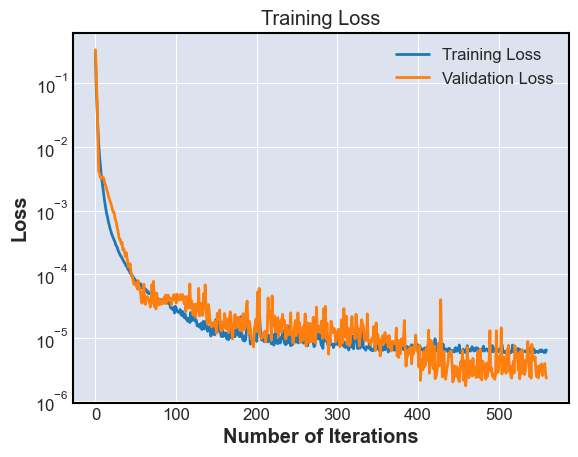

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
Mean Squared Error: 6.386632390728463e-06
                           Expected  Predicted  Correct
Datetime                                               
2024-06-20 11:45:00+00:00  0.000273  -0.000034    False
2024-07-04 10:15:00+00:00  0.000303   0.000554     True
2024-06-26 07:30:00+00:00  0.000236   0.000554     True
2024-07-01 00:00:00+00:00  0.002218   0.000986     True
2024-07-04 13:00:00+00:00 -0.003241   0.000554    False
...                             ...        ...      ...
2024-07-01 05:30:00+00:00  0.000321   0.000470     True
2024-06-29 11:45:00+00:00 -0.000347   0.000554    False
2024-07-03 05:00:00+00:00 -0.001105   0.000554    False
2024-06-29 09:00:00+00:00 -0.000408   0.000554    False
2024-06-27 20:45:00+00:00  0.000360   0.000554     True

[288 rows x 3 columns]
Percentage of correct predictions: 54.17%


In [444]:
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Training Loss')
# log scale for y-axis
plt.yscale('log')
plt.legend()
plt.show()
# make predictions
predictions = model.predict(X_test_scaled)

# transform to 2d array
predictions = predictions.flatten()

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')
# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions.flatten()})
df
# for each line, add if it is correct or not (just use the sign of the expected and predicted values)
df['Correct'] = np.sign(df['Expected']) == np.sign(df['Predicted'])

print(df)

# calculate the percentage of correct predictions
correct = df['Correct'].sum()
total = len(df)

percentage = (correct / total) * 100

print(f'Percentage of correct predictions: {percentage:.2f}%')